In [124]:
#regression--linear regression basic model
#classification ---logistic regression basic derived from st line consider sigmoid function  in logistic regression we can except only 2 o/ps 0 or 1
#if we consider a event probability of event is greaterthan 0.5 then it belongs to class 1 if less than class 0 this is how logistic regression works
#we will set a threshold at 0.5
#only 0 or 1 eqn of st line y=mx+c p=1/(1+e^-(mx+c))
#for multiple clss can be used but 2 clsss better
#Sigmoid function p=1/(1+e^-y)  sigmoid curve
'''
|           ____
|          /    \
|         /
| ______ /
|/________________
'''

'\n|           ____\n|          /    |         /\n| ______ /\n|/________________\n'

In [125]:
import numpy as np
import pandas as pd

In [126]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [127]:
#purchased is the target column
df.shape

(400, 5)

In [128]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [129]:
df.Purchased.unique()

array([0, 1])

In [130]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [132]:
#if we have any uniqe column we have to drop such as userid name
df=df.drop(columns='User ID',axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [133]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [134]:
df.Gender=le.fit_transform(df.Gender)

In [135]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

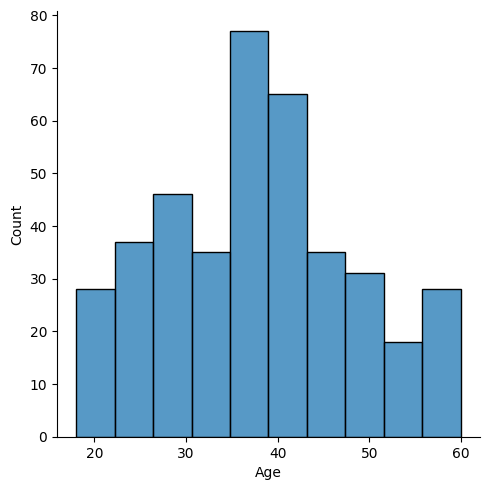

In [137]:
sns.displot(df.Age)

In [138]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


<Axes: ylabel='EstimatedSalary'>

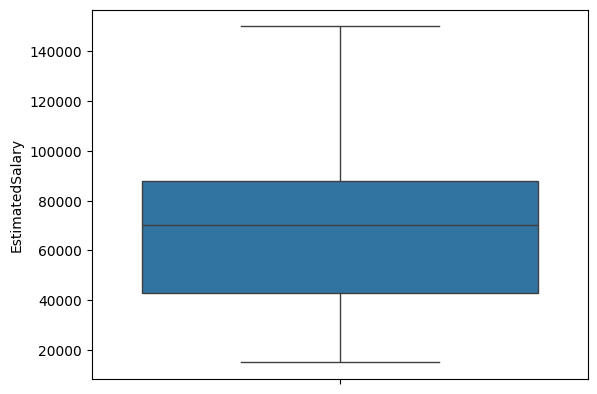

In [139]:
sns.boxplot(df.EstimatedSalary)

<Axes: ylabel='Age'>

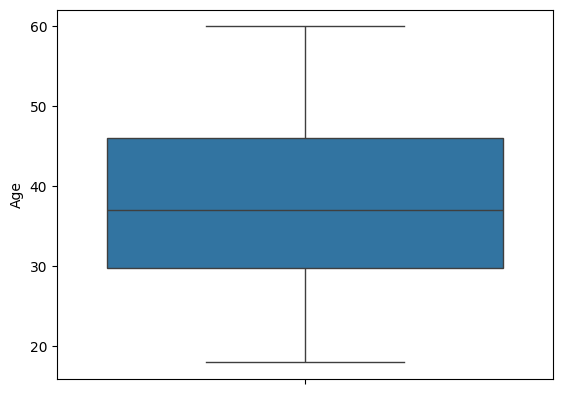

In [140]:
sns.boxplot(df.Age)
#no outliers if any replace with median

In [141]:
#corr
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

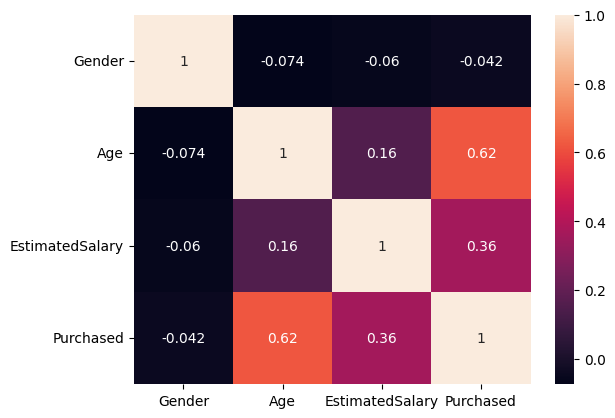

In [142]:
sns.heatmap(df.corr(),annot=True)

In [143]:
df.corr().Purchased.sort_values(ascending=False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender            -0.042469
Name: Purchased, dtype: float64

In [144]:
#X and y split
X=df.drop(columns='Purchased',axis=1)
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [145]:
y=df.Purchased
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [146]:
#scaling for magnitude
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [147]:
scaled_X=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
scaled_X.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


In [148]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.3,random_state=42)

In [149]:
X_train.shape

(280, 3)

In [150]:
X_test.shape

(120, 3)

In [151]:
#model building
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [152]:
model.fit(X_train,y_train)

LogisticRegression()

In [153]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [154]:
y_pred1=model.predict(X_train)
y_pred1

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [155]:
purchased=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred})
purchased.head(20)

,Actual value,Predicted value
209,0,0
280,1,1
33,0,0
210,1,1
93,0,0
84,0,0
329,1,1
94,0,0
266,0,0
126,0,0


In [156]:
purchased.tail(20) #see 354

,Actual value,Predicted value
247,1,1
110,0,0
16,1,0
66,0,0
153,0,0
7,1,1
19,1,0
137,1,0
355,1,1
349,0,0


In [157]:
#testing witn random value
model.predict([[1,26,50000]]) #class 1 purchasing

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

##evaluation techinques for classificatiom

In [158]:
#Evaluation metrics for classification
#accuracy score
#ratio of no of correct prediction to total no of input samples
#accuracy=no of correct predictions/total no of predictions made

In [159]:
#Confusion matrix
'''
matrix representation of results of any binary testing
1:True Postive:65(you have predicted positive case correctly)
2:True Negative:24(you have predicted negative case correctly)
3:False Positive:8(you have predicted these people as having disease but actually they dont)
4:False negative:3(Wrong predictions)
                                Predicted cls
                             class=yes           class=no
Actual cls  class=yes        True Positive       False Negative
            class=no         False Positive      True negative

              0              1
0          65               3
1           8               24
'''

'\nmatrix representation of results of any binary testing\n1:True Postive:65(you have predicted positive case correctly)\n2:True Negative:24(you have predicted negative case correctly)\n3:False Positive:8(you have predicted these people as having disease but actually they dont)\n4:False negative:3(Wrong predictions)\n                                Predicted cls\n                             class=yes           class=no\nActual cls  class=yes        True Positive       False Negative\n            class=no         False Positive      True negative\n\n              0              1\n0          65               3\n1           8               24\n'

In [160]:
#accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [161]:
accuracy_score(y_test,y_pred)

0.8416666666666667

In [162]:
accuracy_score(y_train,y_pred1) #underfitting this should be not there

0.8107142857142857

In [163]:
#so we make change you can change random_state also to other no also but by doing so we cant tell exactly why the accuracy changed somethimes it changes due
#we cant tell its the exact reason
#but if we change we can get better accuracy or fluctuate change random_state from 0 to 42

In [164]:
accuracy_score(y_test,y_pred)   #accuracy score=no of pred/tpotal no==72+29/120=0.84

0.8416666666666667

In [165]:
accuracy_score(y_train,y_pred1)

0.8107142857142857

In [166]:
#now chage test_size to 0.3 it gets somewhat equal accuracy should be graeter than 80 then only model works this is how we play with parameters

In [167]:
#for confusion metrics we can see number of how many correct we did how many errors how many wrong

In [168]:
confusion_matrix(y_test,y_pred)

array([[72,  1],
       [18, 29]])

In [169]:
pd.crosstab(y_test,y_pred)#both same but here we can see class also

col_0,0,1
Purchased,,
0,72,1
1,18,29


In [170]:
#how we analyse it 0 means not purchased 1 purchased 72 actually 0 class we predict 0 correct True negative 1 false positive
#18 false negative 29 true positive
#top side 0 1 0--- negative 1 positive and left side 0 1 false true
#out of 120 73 0s and 29+18 1s

In [171]:
#classification report derived from confusion matrix
#precision recall f1 score

In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88        73
           1       0.97      0.62      0.75        47

    accuracy                           0.84       120
   macro avg       0.88      0.80      0.82       120
weighted avg       0.87      0.84      0.83       120



In [173]:
 #how came from confusion matrix
 #actual value-------recall
 #predicted values used for calculating precision
 #precision means out of all positive prediction how many are really positive
 #  col  0 1
 #  0    72 1
 #  1    18  29            29/(18+29)=.62
 #----------------                                            no of correct pred/total no
 #           29/(29+1)=.97
 #recall out of all +ve cases how many are predicted +ve recall-horizontall  .62
 #precision of 0----------72/72+18 =.8
 #recall of 0 72/73=.98
 #this is very very imp
 #f1 harmonion mean of precison and recall

In [174]:
#precision
#tp/(tp+fp)
29/30

0.9666666666666667

In [175]:
#recall
#actual+ve tp/(fn+tp)
29/(29+18)

0.6170212765957447

In [176]:
#f1 score
#2*precision*recall/(precision+recall)
2*0.97*0.61/(0.97+0.61)           #f1 score for 0 and 1 if there are not somewhat equal then our data is invalid it is invalid .75 and .88 not equal

0.7489873417721519

#auc roc curve

In [177]:
# auc roc curve
#auc is the area under the roc curve auc roc indicates how well the probabilities from the +ve classes are separated from -ve classes
#auc roc curve is a performance measurement for classification problem at various thresholds settings
#Roc(receiver operating characteristics) is probability curve and auc represents degree or measure of separability
#TPR true positive rate FPR false positive rate
#the more auc the more accuracy
#auc=1
#auc=95%
'''

 1 |   roc ....................
   |     .                    |
   |   /                      |
TPR|  /                       |
   | /                        |
   |/              Aoc        |
  0|__________________________|
    FPR
'''

'\n\n 1 |   roc ....................\n   |     .                    |\n   |   /                      | \nTPR|  /                       |\n   | /                        | \n   |/              Aoc        |\n  0|__________________________|\n    FPR\n'

In [178]:
probability=model.predict_proba(X_test)[:,1]
probability#probability for getting +ve classes check y_pred if less than .5----0 so 1st of y_pred 0 greater than .5 ---1 so 2nd obs of y_pred 1

array([0.28584188, 0.8515327 , 0.08044595, 0.67115292, 0.06697684,
       0.13275122, 0.69331909, 0.17029077, 0.38439311, 0.39024172,
       0.2174779 , 0.51707093, 0.05220176, 0.02412687, 0.21082061,
       0.40618551, 0.50922064, 0.51937748, 0.22986447, 0.7246703 ,
       0.03204774, 0.1734297 , 0.32973483, 0.8201656 , 0.02177715,
       0.43092308, 0.46013675, 0.22888411, 0.88309641, 0.02091746,
       0.36522422, 0.05568432, 0.60244848, 0.15598142, 0.53500912,
       0.26696691, 0.23569608, 0.27748908, 0.05520051, 0.04495299,
       0.39877852, 0.06552832, 0.03618023, 0.31719654, 0.04212632,
       0.75089988, 0.12736972, 0.16838425, 0.43591566, 0.14082487,
       0.11795795, 0.72812366, 0.24086304, 0.11995976, 0.31469254,
       0.05773453, 0.9003624 , 0.22469158, 0.18839621, 0.19430683,
       0.28886951, 0.19259635, 0.7369355 , 0.16589677, 0.11200296,
       0.31695471, 0.48796596, 0.82089056, 0.27613241, 0.35910266,
       0.8751098 , 0.0728132 , 0.09998709, 0.03374886, 0.37770

In [179]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [181]:
#roc curve import roc sklearn
fpr,tpr,threashsholds=roc_curve(y_test,probability)

Text(0, 0.5, 'TPR')

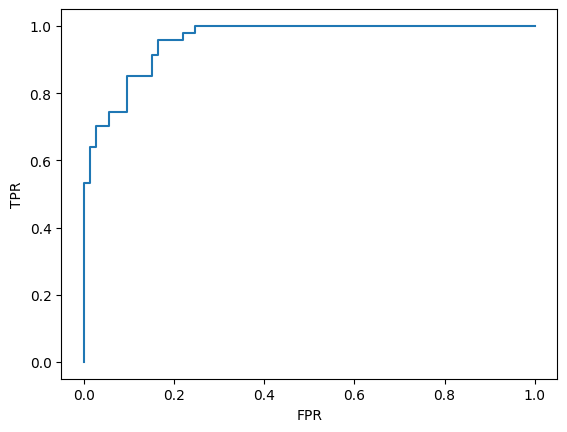

In [183]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [186]:
#Auc score
roc_auc_score(y_test,probability)
#so it is good so we can go with logistioc regression for data

0.9577382687263188